<a href="https://colab.research.google.com/github/BrucellariaLeonardo/ToColab/blob/master/TensorFlowTurorials/01Guia_inicial_de_TensorFlow_2_0_para_principiantes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Notebook generado a partir de la guia paso a paso de inicio a tensorflow https://www.tensorflow.org/tutorials/quickstart/beginner?hl=es-419

## Bajando el data set

In [1]:
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist #generando dataset

In [3]:
(xTrain, yTrain), (xTest, yTest) = mnist.load_data() # descaarga y unpack del data set
# cada pixel toma un valor entre 0 y 255, asique los normalizamos entre 0 y 1
xTrain = xTrain/255.0 
xTest = xTest/255.0

## Construyendo un modelos

Vamos a implementar n modelo fully conected. Las imagenes del data set mnist poseen un tamaño de 28*28, asique vamos a iniciar con una capa flatten, despues una capa de 128 neuronas activada por por una funcion relu, se agrega un dropout para reducir el overfitin y finalmente una ultima capa de 10 elementos activada por softma para generar las categorias de saida.

In [4]:
# el metodo sequential agrega capas en cascada al modelo
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(input_shape= (28,28)), #redimension de las  imagenes
                                    tf.keras.layers.Dense(128, activation= 'relu'), #Capa fully conected
                                    tf.keras.layers.Dropout(0.2), #desactivacion de neuronas
                                    tf.keras.layers.Dense(10, activation='softmax'), #capa para presentacion de datos
])

In [7]:
# definicion de los parametros de entrenamiento
model.compile(optimizer= 'adam',
              loss= 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

## Entrenamiento del modelo

In [8]:
model.fit(xTrain, yTrain, epochs = 5)
model.evaluate(xTest, yTest, verbose=2)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3025 - accuracy: 0.9123
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1434 - accuracy: 0.9573
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1050 - accuracy: 0.9688
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0869 - accuracy: 0.9737
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0750 - accuracy: 0.9763
313/313 - 1s - loss: 0.0805 - accuracy: 0.9751 - 531ms/epoch - 2ms/step


[0.08053483814001083, 0.9750999808311462]

## Usando el modelo

9
Predicted: 9.
Correct answer: 9


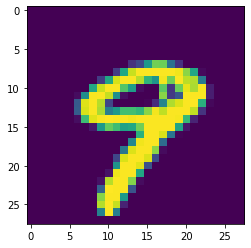

In [79]:
import matplotlib.pyplot as plt

x = 9

print(yTest[x])
plt.imshow(xTest[x]*255)
print(f'Predicted: {model.predict(xTest[x:x+1]).argmax()}.')
print(f'Correct answer: {yTest[x]}')